**Lista 1 - Finanças Quantitativas**

**Mário Augusto Fuzetti Bueno Filho**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Questão 1

<b> Considere uma ação cujo preco atual é R\\$100. Analistas financeiros concluíram que há duas
possibilidades de preço ao final do próximo mês: R\\$105 e R\\$95, ambos cenários com probabilidade de
50%.
Existe a possibilidade de comprar uma opçao de compra desta ação com preço de exercício de
R\\$102 ao final do mês. Atualmente a opção custa R\\$1.60.

## a) Considerando uma taxa livre de risco de 0% ao mês, você compraria esta opção? Por que?

$P^{o}_{t} = ?$

<b>Analisando os dois cenários:

- $105: - 105\Delta + 100\Delta + 3$

- $95: - 95\Delta + 100\Delta + 0$

<b>Igualando e resolvendo a equação:

$- 105\Delta + 100\Delta + 3 =  - 95\Delta + 100\Delta + 0$

$- 5\Delta + 3 = 5\Delta$

$10\Delta = 3$

$\Delta = 0.3$
    
Logo $P^{o}_{t} = 1.5$

<b> R: Como o valor atual da opção está acima do valor teórico, não compraria a opção de compra.

## b) Se a taxa de livre de risco for 1% sua decisão mudaria?

---

# Questão 2

<b>Considere uma roleta em um cassino que possui números de 1 a 30. Ao jogar nesta roleta,
suponha que uma pessoa escolha um número ímpar e faça sua aposta. Se o crupiê girar a roleta e obtiver
um número par, a pessoa perde todo o valor apostado. Se a bolinha parar em um número ímpar, mas
diferente daquele escolhido, a pessoa perde metade do valor apostado. Caso a pessoa acerte o número
sorteado, ela recebe 50 vezes o valor apostado. O mesmo raciocínio vale se a pessoa escolher um número
par.
    Suponha que esta pessoa possua um capital disponível M, seja viciada em jogos e possua todo o
tempo do mundo, isto é, está disposta a apostar na roleta infinitamente.

## a) Qual porcentagem ideal de M que ela deve apostar de forma a maximizar o retorno esperado deste jogo? Qual é este retorno esperado?

In [2]:
probabilidades = np.array([15/30, 14/30, 1/30])
patrimonio = np.array([0, 0.5, 51])

expected_return = sum(probabilidades * patrimonio) - 1
print('R: O retorno esperado é de: {:.2f}% se a pessoa apostasse 100% de seu patrimônio.'.format(expected_return*100))

R: O retorno esperado é de: 93.33% se a pessoa apostasse 100% de seu patrimônio.


## b) O que vai acontecer na prática se ela apostar a proporção obtida acima?

In [3]:
retornos = [-1, -0.5, 51]

# calculando retornos para diferentes tamanhos de posição
media_aritmetica = lambda x: np.sum([p * (1 + (r * x)) for r, p in zip(retornos, probabilidades)]) - 1
media_temporal = lambda x: np.prod([(1 + (r * x))**(p) for r, p in zip(retornos, probabilidades)]) - 1

capital = np.arange(0, 1, 0.001)

retornos_aritimeticos = [media_aritmetica(x) for x in capital]
retornos_temporais = [media_temporal(x) for x in capital]

data = [capital, retornos_aritimeticos, retornos_temporais]
df_retornos = pd.DataFrame(np.transpose(data), columns=['Patrimônio', 'E(X)', 'Gx'])
df_retornos.tail()

,Patrimônio,E(X),Gx
995,0.995,0.961833,-0.941502
996,0.996,0.962800,-0.947700
997,0.997,0.963767,-0.954726
998,0.998,0.964733,-0.963050
999,0.999,0.965700,-0.973884


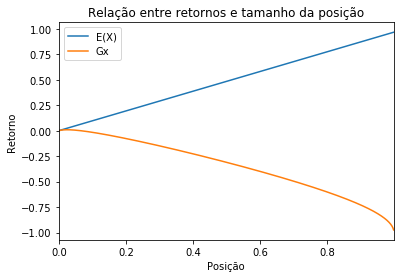

In [4]:
df_retornos.set_index('Patrimônio').plot(
    title='Relação entre retornos e tamanho da posição',
)
plt.xlabel('Posição'), plt.ylabel('Retorno')
plt.show()

<b>R: Na prática o retorno seria mais parecido com a média geométrica, sendo mais provável que a pessoa perca todo seu capital se apostar 100% dele.

<h2> c) 
    Qual é aproximadamente a proporção de M que deve ser apostada repetidamente de forma a
    maximizar os lucros obtidos?

In [5]:
gx_max = df_retornos.set_index('Patrimônio')['Gx'].idxmax()
df_retornos[df_retornos['Patrimônio'] == gx_max]

,Patrimônio,E(X),Gx
25,0.025,0.024167,0.00891


<b> R: A proporção de M deveria ser aproximadamente 2.5%.

---

# Questão 3
<b>Considere os preços diários de todos os ativos disponibilizados em 2020 e, separadamente,
em 2019 (do primeiro dia de 2019 ao primeiro dia de 2020). Calcule as correlações de cada ativo com o
índice IBOV tanto em 2019 quanto em 2020.

In [6]:
# leitura dos dados
df_prices = pd.read_csv('IBOV.csv', parse_dates=['Date'], index_col='Date')

## a) Em 2019, quais as correlações média, mínima, máxima (e seus respectivos ativos)?

In [7]:
# seleciona periodo, extrai correlação com IBOV, e remove correlação de IBOV com ele mesmo
corr_2019 = df_prices.loc['2019-01-01':'2020-01-02'].corr().loc['IBOV'].drop('IBOV')

print('Mean : %.4f' % corr_2019.mean())
print('Max  : %.4f  (%s)' % (corr_2019.max(), corr_2019.idxmax())) # Obtem indice do item de maior valor
print('Min  : %.4f (%s)' % (corr_2019.min(), corr_2019.idxmin())) # Obtem indice do item de menor valor

Mean : 0.6261
Max  : 0.9998  (BOVA11)
Min  : -0.6940 (BRKM5)


## b)  Em 2020, quais as correlações média, mínima, máxima (e seus respectivos ativos)?

In [8]:
corr_2020 = df_prices.loc['2020'].corr().loc['IBOV'].drop('IBOV')

print('Mean : %.4f' % corr_2019.mean())
print('Max  : %.4f (%s)' % (corr_2020.max(), corr_2020.idxmax()))
print('Min  : %.4f (%s)' % (corr_2020.min(), corr_2020.idxmin()))

Mean : 0.6261
Max  : 0.9999 (BOVA11)
Min  : 0.2413 (BTOW3)


 <h2> c) Plote também dois histogramas com as correlaçõoes de todos os ativos com índice, um para 2019 e
outro 2020. Ajuste o eixo X para mostrar de -1 a 1, e o eixo Y para que seja igual para os dois
casos. Qual interpretação você tira dessa análise? </h2>

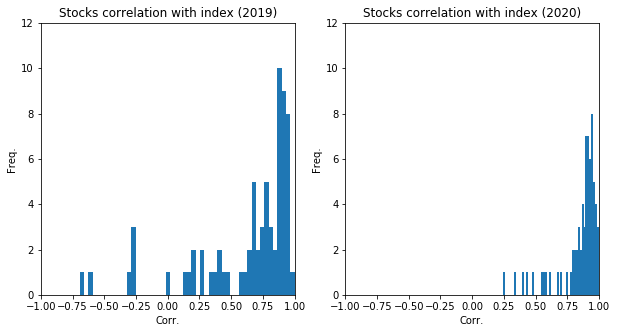

In [9]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(corr_2019, bins=50)
plt.title('Stocks correlation with index (2019)')
plt.xlabel('Corr.'), plt.ylabel('Freq.')
plt.ylim(0, 12), plt.xlim(-1, 1)

plt.subplot(1, 2, 2)
plt.hist(corr_2020, bins=50)
plt.title('Stocks correlation with index (2020)')
plt.xlabel('Corr.'), plt.ylabel('Freq.')
plt.ylim(0, 12)
plt.xlim(-1, 1)
plt.show()

<b>Em 2019 a concentração de barras de frenquência à direita mostra que as ações possuem correlação predominantemente positiva com o índice, o que faz muito sentido tendo em vista que muitos desses ativos fizeram/fazem parte do índice. Entretanto é possível observar que há ativos que tiveram correlação negativa ou (quase) nula.

<b>O mesmo aparenta estar acontecendo para 2020, mas de maneira ainda mais extrema, não há qualquer frequência abaixo do valor 0.25 até então, o que pode ser efeito da grande queda que a maioria dos ativos sofre devido à ao início da pandemia no Brasil juntamente com a retomada mais recente fazendo com que os preços subam juntos.

---

# Questão 4
<b>A partir dos dados diários da Bovespa disponibilizados, obtenha os 250 retornos mais recentes
(simbolizando mais ou menos 1 ano em dias ´uteis). Considere um portfolio igualmente distribuído nos
ativos BOVA11, PETR4, ABEV3, SUZB3 e ITSA4. Complete a tabela e discuta alguns
aspectos:

<b>• Ao calcular o VaR você verá que a resposta não é tão óbvia. Explique como você definiu o valor a
ser utilizado.
    
<b>• O que os valores da curtose sugerem.
    
<b>• Como o portfolio se compara com o ativos individuais em relação ao risco esperado.

In [10]:
# calculo de retornos
returns = df_prices.tail(251).pct_change().dropna()
print(returns.shape) # verica dimensões do dataframe

(250, 72)


In [11]:
# Função de VaR histórico
def value_at_risk(returns, alpha=0.05):
    returns = sorted(returns)
    var_idx = int(len(returns) * alpha) + 1
    return returns[var_idx]

<b> Tabela dos ativos:

In [12]:
stocks = ['BOVA11', 'PETR4', 'ABEV3', 'SUZB3', 'ITSA4'] # ativos do portfolio
returns['Portfolio'] = returns[stocks].mean(axis=1) # calcula média

table = returns[stocks + ['Portfolio']].agg({
    'mean', 'std', 'skew', 'kurtosis', value_at_risk
}).T # calcula as métricas dos ativos e do portfolio e transpoe a tabela

table = table[['mean', 'std', 'skew', 'kurtosis', 'value_at_risk']]
table.columns = ['Expected Return', 'Std. deviation', 'Skewness', 'Kurtosis', 'VaR 5%'] # renomeia as colunas
table.index.name = 'Asset' # renomeia indice
table

,Expected Return,Std. deviation,Skewness,Kurtosis,VaR 5%
Asset,,,,,
BOVA11,0.000441,0.026977,-1.060548,10.585434,-0.036404
PETR4,0.000584,0.041429,-1.459206,16.718933,-0.037383
ABEV3,-0.001269,0.026817,-0.915121,7.570052,-0.039604
SUZB3,0.002291,0.034291,-0.084686,4.876933,-0.047619
ITSA4,-0.000191,0.026707,-0.347229,2.944303,-0.044706
Portfolio,0.000371,0.024660,-1.667955,12.842249,-0.027936


**Simulações de VaR 5% usando Monte Carlo:**

In [13]:
def var_sim(returns, alpha=0.05):
    rmu, rsd = returns.mean(), returns.std()
    simulations = returns[-1] * (1 + (rmu + rsd * np.random.normal(0, 1, 10000))) # Simplified

    simulations = sorted(simulations)
    var_idx  = int(len(simulations) * alpha) + 1
    simulated_var_price = simulations[var_idx]
    return simulated_var_price

def var5_sim(returns):
    rmu, rsd = returns.mean(), returns.std()
    var_5 = norm.ppf(q=0.05, loc=rmu, scale=rsd)
    return returns[-1]*(1+var_5)

from scipy.stats import norm

print('Historic VaR assuming normal distribution:')
display(returns[stocks + ['Portfolio']].apply(var_sim))

print('Monte Carlo, using Constant Expected Return model with epsilon ~ N(0, 1):')
display(returns[stocks + ['Portfolio']].apply(var5_sim))

Historic VaR assuming normal distribution:


BOVA11       0.011397
PETR4        0.001613
ABEV3        0.005789
SUZB3        0.021718
ITSA4        0.011252
Portfolio    0.010454
dtype: float64

Monte Carlo, using Constant Expected Return model with epsilon ~ N(0, 1):


BOVA11       0.011397
PETR4        0.001609
ABEV3        0.005794
SUZB3        0.021725
ITSA4        0.011246
Portfolio    0.010452
dtype: float64

## Conclusões:
<b>• O VaR calculado é bem diferente de um VaR obtido numa simulação de Monte Carlo, isso se deve principalmente ao fato de que nas simulações assumimos uma distribuição normal, o que é não é a relidade desses retornos.

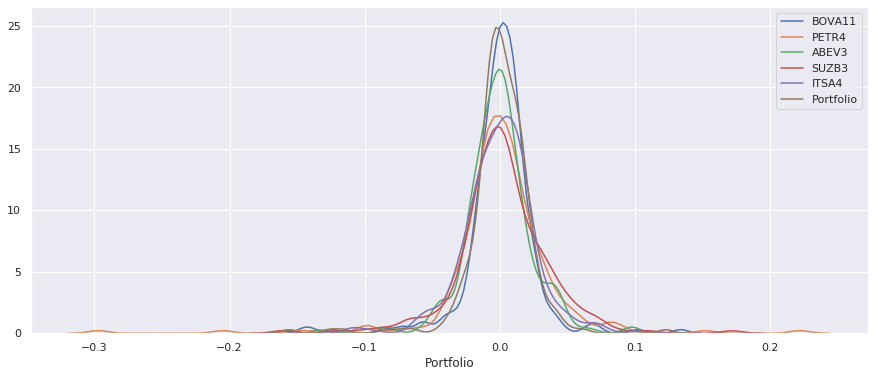

In [14]:
import seaborn as sns; sns.set()
plt.figure(figsize=(15, 6))
for col in stocks + ['Portfolio']:
    sns.distplot(returns[col], hist=False, kde_kws={"shade": False}, bins=30, label=col)
plt.legend()
plt.show()

<b>• Os Valores de Kurtose sugerem que as distribuições dos ativos são Leptocúrticas (com exceção de ITSA4), isto é possuem Curtose > 3, apresentando caudas muito pesadas que podem significar um grande número de *outliers*, principalmente em BOVA11, PETR4, ABEV3 e consequentemento o próprio Portfólio.
    

<b>• A métricas de risco do Portfólio refletem o efeito da diversificação, apesar de ser um portfólio igualmente ponderado, o risco esperado e VaR 5% foram menores do que qualquer outro ativo individualmente.
    

---

In [1]:
!jupyter nbconvert lista_1.ipynb --template toc2

[NbConvertApp] Converting notebook lista_1.ipynb to html
[NbConvertApp] Writing 412477 bytes to lista_1.html
